Running analysis on the 2025 NASCAR Cup Series Bristol night race 

Race had severe tire wear and I am attempting to identify patterns in tire wear related to optimal lap times

My hypothesis from watching the race is that early run (first few laps) speed does not negatively impact long run speed from wear. However, after the first few laps, tire 
wear is severe and impacts long run speed

I will attempt to build a model that looks at the first 5-10 laps and average lap times to see how cars that were pushing compared to cars that were saving later on in their runs

First I need to import data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

laps = pd.read_csv('laps.csv')
laps.head()

,driver_name,driver_id,manufacturer,car_number,lap_number,running_position,lap_speed,lap_time,team,playoffs,points_ineligible,starting_position,finish_position,statuses
0,AJ Allmendinger,3774,Chv,16,3,1,123.403,15.549,Kaulig Racing,False,False,1,36,green
1,AJ Allmendinger,3774,Chv,16,4,1,122.874,15.616,Kaulig Racing,False,False,1,36,green
2,Ty Gibbs,4368,Tyt,54,4,2,122.584,15.653,Joe Gibbs Racing,False,False,4,10,green
3,AJ Allmendinger,3774,Chv,16,5,1,122.505,15.663,Kaulig Racing,False,False,1,36,green
4,Carson Hocevar,4326,Chv,77,477,8,122.341,15.684,Spire Motorsports,False,False,12,7,green


<Figure size 1200x800 with 0 Axes>

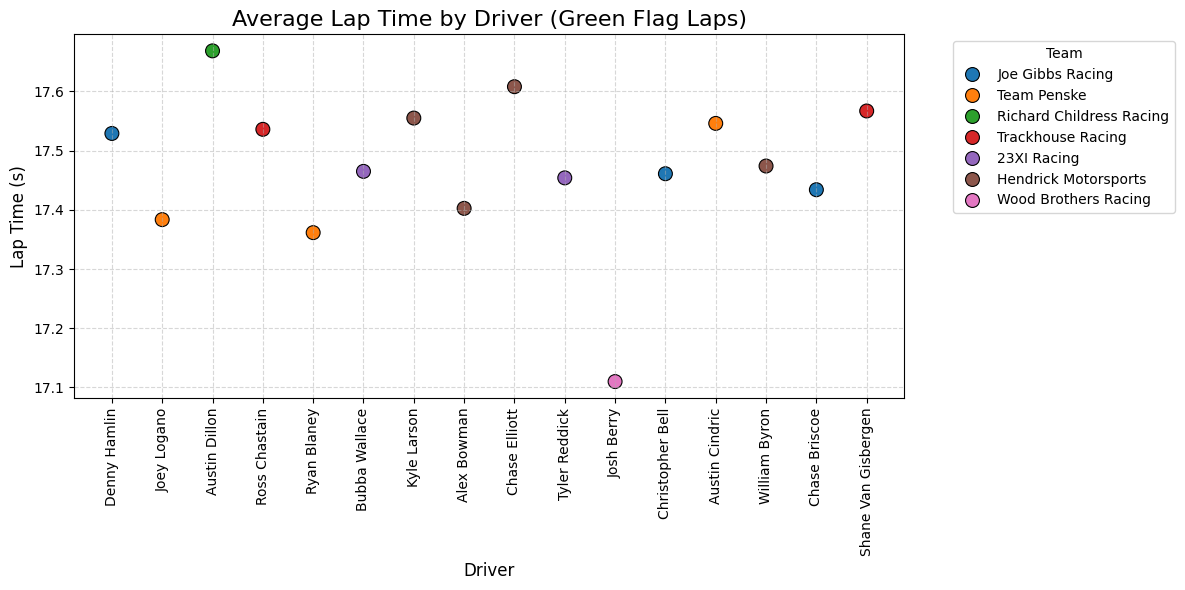

In [42]:
# basic plot to show average lap times by driver 

lap_avg = laps[laps['statuses'] == 'green']
lap_avg = laps[laps['playoffs'] == True]
lap_avg = lap_avg.groupby(['driver_id', 'driver_name', 'team', 'playoffs'])['lap_time'].median().reset_index()


plt.figure(figsize=(12,8))
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=lap_avg,
    x='driver_name',
    y='lap_time',
    hue='team',           # color dots by team
    palette='tab10',      # nice color palette
    s=100,                # size of the dots
    edgecolor='black'     # black edge for more definition
)

# Rotate x-axis labels 90 degrees
plt.xticks(rotation=90)

# Add title and labels
plt.title('Average Lap Time by Driver (Green Flag Laps)', fontsize=16)
plt.xlabel('Driver', fontsize=12)
plt.ylabel('Lap Time (s)', fontsize=12)

# Make the legend prettier
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()